<a href="https://colab.research.google.com/github/poojitha1114/heart-disease-prediction/blob/main/cardioascular_diesase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()



Saving Heart Attack.csv to Heart Attack.csv


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [10]:
# Load dataset
file_path = 'Heart Attack.csv'
df = pd.read_csv(file_path)


In [11]:
df.fillna(method='ffill', inplace=True)


/tmp/ipython-input-4002983762.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [12]:
# Encode target column
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])



In [13]:
# Feature-target split
X = df.drop('class', axis=1)
y = df['class']


In [14]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [16]:
# Model training
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42)
}


In [17]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name}")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


K-Nearest Neighbors
Accuracy: 0.6287878787878788
Confusion Matrix:
 [[ 82  73]
 [ 74 167]]
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.53      0.53       155
           1       0.70      0.69      0.69       241

    accuracy                           0.63       396
   macro avg       0.61      0.61      0.61       396
weighted avg       0.63      0.63      0.63       396


Naive Bayes
Accuracy: 0.9141414141414141
Confusion Matrix:
 [[153   2]
 [ 32 209]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.99      0.90       155
           1       0.99      0.87      0.92       241

    accuracy                           0.91       396
   macro avg       0.91      0.93      0.91       396
weighted avg       0.93      0.91      0.92       396


Random Forest
Accuracy: 0.9797979797979798
Confusion Matrix:
 [[150   5]
 [  3 238]]
Classification Report:
             

In [18]:
# Compare model performances
best_model = max(results, key=results.get)
print("\nBest Model:", best_model, "with Accuracy:", results[best_model])


Best Model: Random Forest with Accuracy: 0.9797979797979798


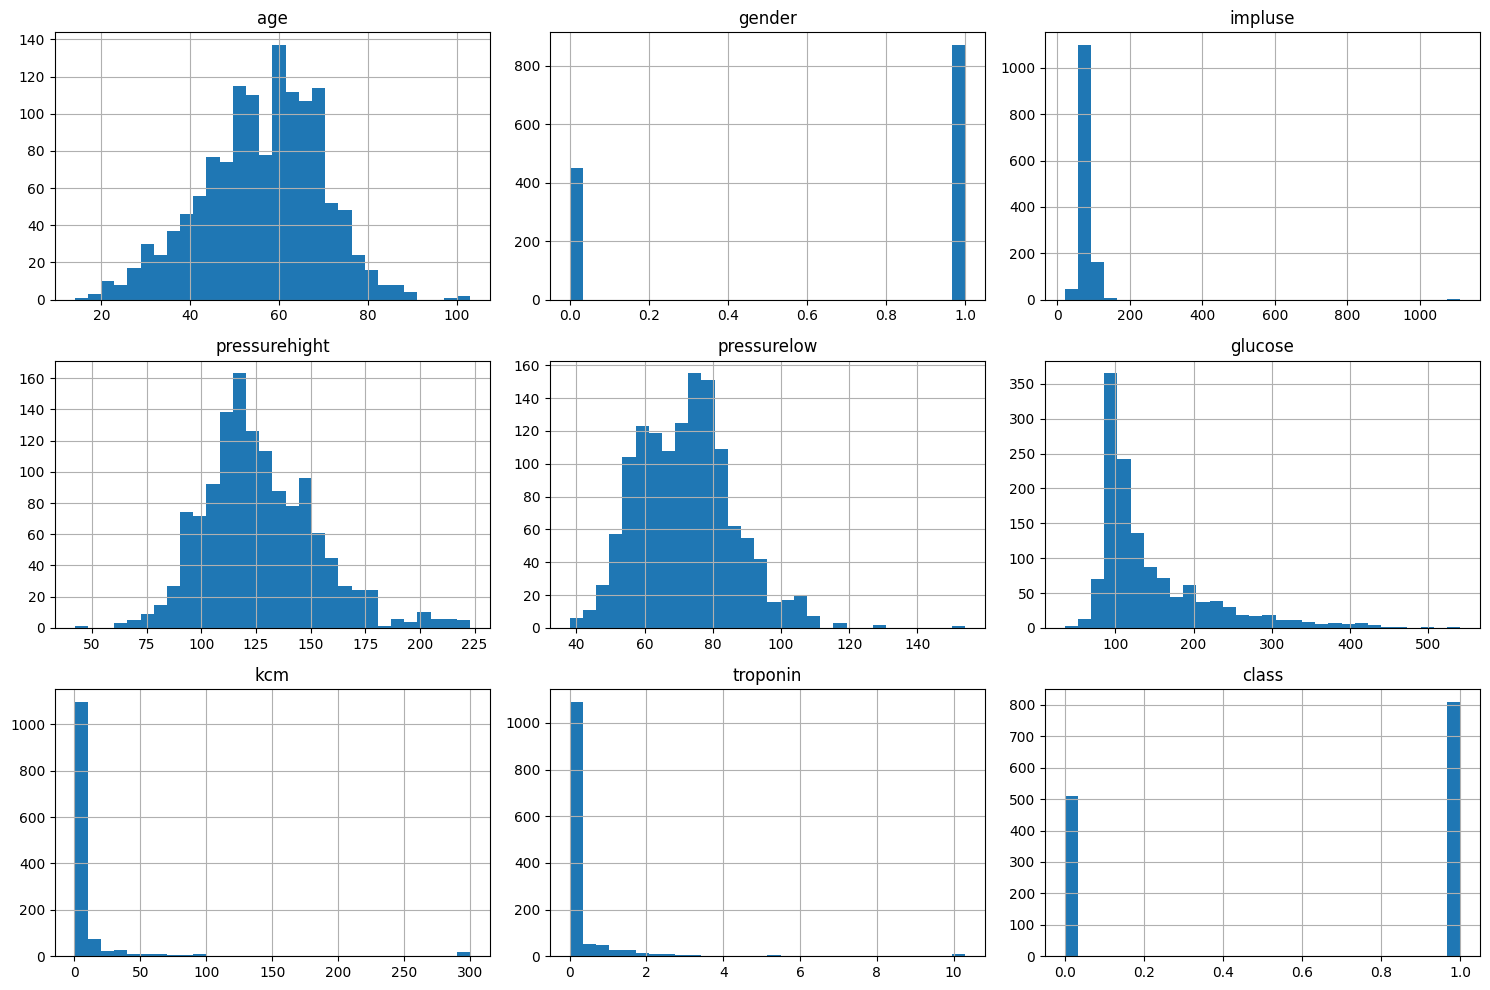

In [19]:
# Visualize data distribution
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


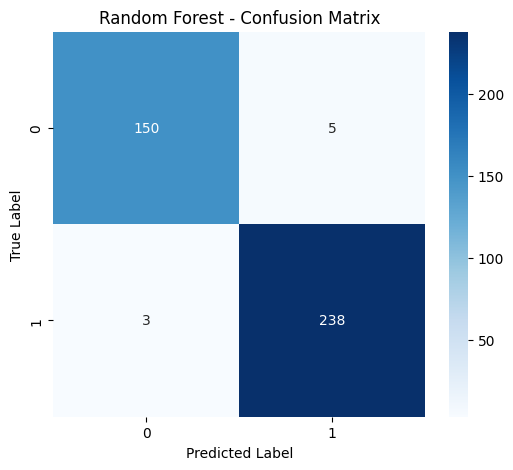

In [20]:
# Confusion matrix for best model
best_model_instance = models[best_model]
y_pred_best = best_model_instance.predict(X_test)
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.title(f"{best_model} - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()